In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
chunksize=100000
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
# movies
date_parser = lambda x: pd.to_datetime(x, unit='s')

# movies
data = pd.DataFrame()  # initialize an empty dataframe
for index, chunk in enumerate(pd.read_csv('../samples/combined_movies_ratings_tags.csv',
                         chunksize=chunksize,
                         )):
    # Perform operations on the chunk
    # processed_chunk = chunk[chunk['column_name'] > 0]  # Example operation
    data = pd.concat([data, chunk])
    print(f"Chunk {index} loaded")
print("ratings dataset loaded")

Chunk 0 loaded
Chunk 1 loaded
Chunk 2 loaded
Chunk 3 loaded
Chunk 4 loaded
Chunk 5 loaded
Chunk 6 loaded
Chunk 7 loaded
Chunk 8 loaded
Chunk 9 loaded
Chunk 10 loaded
Chunk 11 loaded
Chunk 12 loaded
Chunk 13 loaded
Chunk 14 loaded
ratings dataset loaded


I have combined the datasets and loaded them into the file, next I will explore the combined dataset

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483436 entries, 0 to 1483435
Data columns (total 36 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   movieId             1483436 non-null  int64  
 1   title               1483436 non-null  object 
 2   genres              1483436 non-null  object 
 3   movie_name          1483343 non-null  object 
 4   movie_year          1483343 non-null  float64
 5   (no genres listed)  1483436 non-null  bool   
 6   Action              1483436 non-null  bool   
 7   Adventure           1483436 non-null  bool   
 8   Animation           1483436 non-null  bool   
 9   Children            1483436 non-null  bool   
 10  Comedy              1483436 non-null  bool   
 11  Crime               1483436 non-null  bool   
 12  Documentary         1483436 non-null  bool   
 13  Drama               1483436 non-null  bool   
 14  Fantasy             1483436 non-null  bool   
 15  Film-Noir      

The merged dataset has 1,483,436 rows and 36 different variables. All the initial variables from the Ratings, Movies and Tags tables are included. The remaining variables are created from feature engineering. The majority of these new variables are one-hot encoded genres from the Movies table 

userId: string,
movieId: string,
tag: string,
tag_timestamp: datetime,
cleaned_tag: string,
tag_length: int,
tag_year: string,
title: string,
genres: list,
movie_name: string,
movie_year: string,
(no genres listed): boolean,
Action: boolean,
Adventure: boolean,
Animation: boolean,
Children: boolean,
Comedy: boolean,
Crime: boolean,
Documentary: boolean,
Drama: boolean,
Fantasy: boolean,
Film-Noir: boolean,
Horror: boolean,
IMAX: boolean,
Musical: boolean,
Mystery: boolean,
Romance: boolean,
Sci-Fi: boolean,
Thriller: boolean,
War: boolean,
Western: boolean,
user_rating: int,
rating_timestamp:datetime,
rating_year:string,
rating_month:string,
rating_season:string

In [60]:
data.describe()

,movieId,movie_year,userId,user_rating,rating_year,rating_month,tag_length,tag_year
count,1.483436e+06,1.483343e+06,1.483436e+06,1.483436e+06,1.483436e+06,1.483436e+06,30023.000000,30023.000000
mean,7.478570e+03,1.990860e+03,6.985338e+04,3.589470e+00,2.003283e+03,6.686421e+00,10.909170,2010.576425
std,1.795797e+04,1.405808e+01,4.070900e+04,1.048145e+00,5.234043e+00,3.574174e+00,5.600349,2.377842
min,1.000000e+00,1.893000e+03,1.000000e+00,1.000000e+00,1.995000e+03,1.000000e+00,3.000000,2006.000000
25%,6.480000e+02,1.987000e+03,3.418800e+04,3.000000e+00,1.999000e+03,4.000000e+00,7.000000,2009.000000
50%,1.907000e+03,1.995000e+03,7.144300e+04,4.000000e+00,2.002000e+03,7.000000e+00,10.000000,2011.000000
75%,3.910000e+03,1.999000e+03,1.055180e+05,4.000000e+00,2.007000e+03,1.000000e+01,13.000000,2012.000000
max,1.311580e+05,2.015000e+03,1.384930e+05,5.000000e+00,2.015000e+03,1.200000e+01,149.000000,2015.000000


No useful information here. 

In [61]:
data.head(10)

,movieId,title,genres,movie_name,movie_year,(no genres listed),Action,Adventure,Animation,Children,...,user_rating,rating_timestamp,rating_year,rating_month,rating_season,tag,tag_timestamp,cleaned_tag,tag_length,tag_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,4.0,2014-04-12 21:27:53,2014,4,Spring,NaN,NaN,NaN,NaN,NaN
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,3.0,2005-11-23 02:06:57,2005,11,Autumn,NaN,NaN,NaN,NaN,NaN
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,4.0,1997-02-17 22:17:59,1997,2,Winter,NaN,NaN,NaN,NaN,NaN
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,4.0,2006-08-04 10:15:13,2006,8,Summer,NaN,NaN,NaN,NaN,NaN
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,4.0,1997-10-27 20:06:58,1997,10,Autumn,NaN,NaN,NaN,NaN,NaN
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,5.0,2002-11-19 20:54:26,2002,11,Autumn,NaN,NaN,NaN,NaN,NaN
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,5.0,2011-02-07 02:12:00,2011,2,Winter,NaN,NaN,NaN,NaN,NaN
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,2.0,1999-09-27 14:30:56,1999,9,Autumn,NaN,NaN,NaN,NaN,NaN
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,4.0,2005-03-22 11:20:11,2005,3,Spring,NaN,NaN,NaN,NaN,NaN
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995.0,False,False,True,True,True,...,5.0,1996-11-06 11:52:03,1996,11,Autumn,NaN,NaN,NaN,NaN,NaN


In [62]:
# Convert user_rating to integer
data['user_rating_cat'] = data['user_rating'].astype(int)

# Convert user_rating to categorical
data['user_rating_cat'] = data['user_rating_cat'].astype('category')

genres = data['genres'].str.split('|').explode().str.get_dummies().columns.tolist()

# List of genres
genres_and_ratings = ['user_rating_cat'] + genres

# Count the number of movies in each genre
genre_counts = data[genres_and_ratings]

genre_counts.head(20)

,user_rating_cat,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,5,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,5,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,2,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,4,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,5,False,False,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
# Assuming data is already defined and contains the necessary columns

# Step 1: Melt the DataFrame to long format
melted_data = data.melt(id_vars='user_rating_cat', 
                        value_vars=genres,
                        var_name='genre',
                        value_name='is_genre')

# Filter out rows where the movie does not belong to the genre (assuming 1 indicates the movie belongs to the genre)
melted_data = melted_data[melted_data['is_genre'] == 1]

# melted_data["user_rating_num"] = melted_data['user_rating_cat'].astype(int)
# melted_data_sorted = melted_data.groupby('genre')['user_rating_num'].sum().reset_index()
# melted_data_sorted = melted_data_sorted.sort_values(by='user_rating_num', ascending=False).reset_index(drop=True)

# Step 2: Group by genre and user_rating_cat, then count the number of movies
genre_rating_counts = melted_data.groupby(['genre', 'user_rating_cat']).size().reset_index(name='count')

# Display the result
print(genre_rating_counts.head(20))

                 genre user_rating_cat   count
0   (no genres listed)               1       5
1   (no genres listed)               2       7
2   (no genres listed)               3       7
3   (no genres listed)               4      12
4   (no genres listed)               5       7
5               Action               1   20563
6               Action               2   43434
7               Action               3  126074
8               Action               4  146647
9               Action               5   72470
10           Adventure               1   14440
11           Adventure               2   31312
12           Adventure               3   94988
13           Adventure               4  116613
14           Adventure               5   61606
15           Animation               1    2738
16           Animation               2    6061
17           Animation               3   22462
18           Animation               4   32500
19           Animation               5   17297


/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_24149/3291707856.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_rating_counts = melted_data.groupby(['genre', 'user_rating_cat']).size().reset_index(name='count')


                 genre  user_rating_num
0            Film-Noir         4.043486
1                  War         3.889533
2          Documentary         3.834963
3                 IMAX         3.752579
4                Crime         3.735350
5                Drama         3.734894
6              Mystery         3.725695
7            Animation         3.685398
8              Musical         3.643696
9              Western         3.627073
10             Romance         3.607466
11             Fantasy         3.574850
12            Thriller         3.567060
13           Adventure         3.563185
14              Action         3.505946
15              Sci-Fi         3.496632
16              Comedy         3.491147
17            Children         3.475788
18              Horror         3.357454
19  (no genres listed)         3.236842


/var/folders/55/xtgthnr12lz2b2j6l0pqj7zm0459s6/T/ipykernel_24149/2414147083.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='user_rating_num', y='genre', data=mean_rating_per_genre, palette="hls")


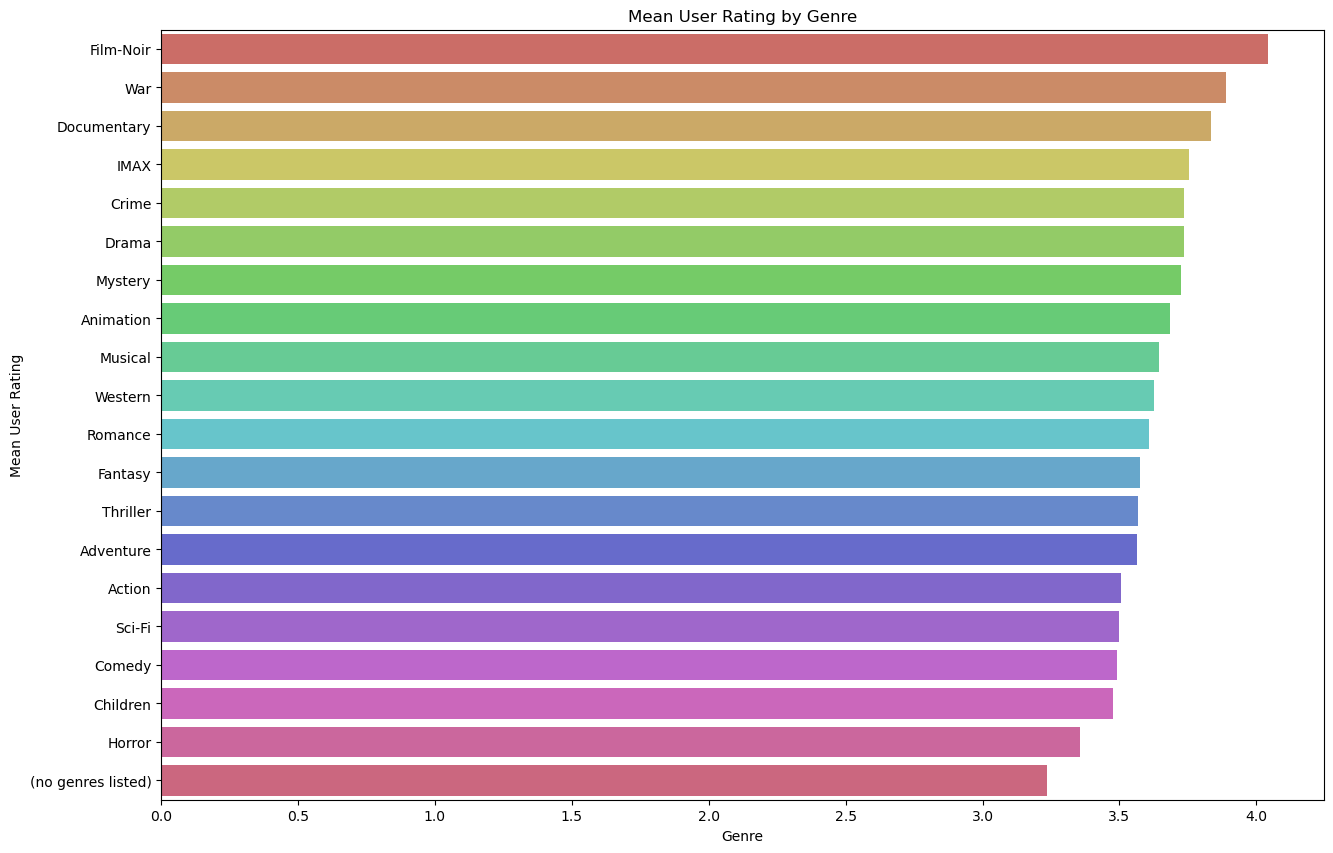

In [80]:
melted_data['user_rating_num'] = melted_data['user_rating_cat'].astype(int)

mean_rating_per_genre = melted_data.groupby('genre')['user_rating_num'].mean().reset_index()
mean_rating_per_genre = mean_rating_per_genre.sort_values(by='user_rating_num', ascending=False).reset_index(drop=True)
# Display the result
print(mean_rating_per_genre)

# Step 3: Create a bar plot of mean ratings per genre
plt.figure(figsize=(15, 10))
sns.barplot(x='user_rating_num', y='genre', data=mean_rating_per_genre, palette="hls")
plt.title('Mean User Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean User Rating')
plt.show()

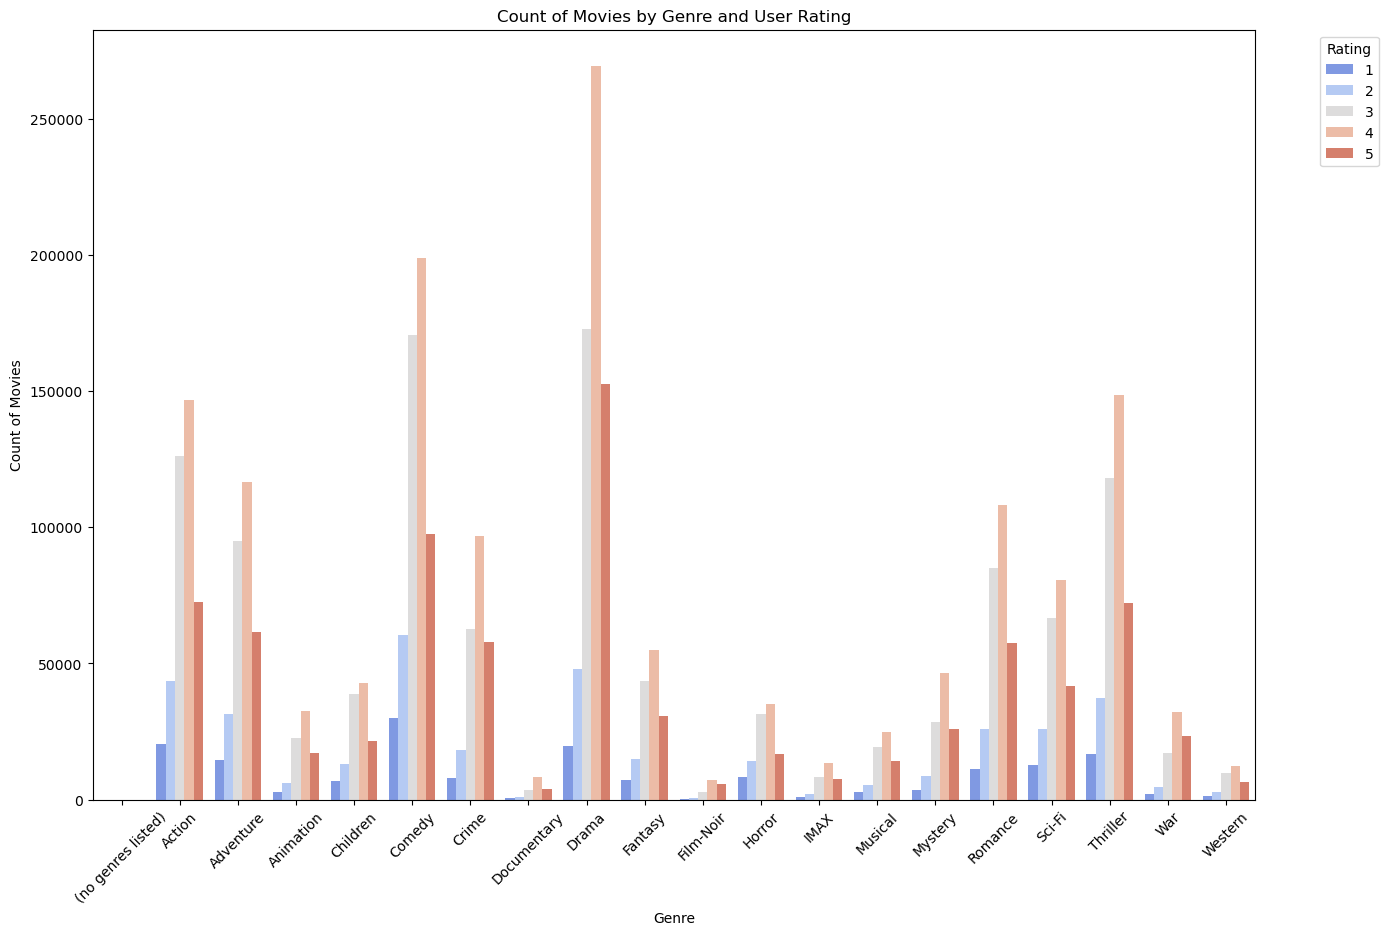

In [73]:
plt.figure(figsize=(15, 10))
sns.barplot(x='genre', y='count', hue='user_rating_cat', data=genre_rating_counts, palette="coolwarm")
plt.xticks(rotation=45)
plt.title('Count of Movies by Genre and User Rating')
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()